<h1 style="text-align: center; background-color:#E9F7EF; font-family:Arial; color:#526085">ĐỒ ÁN THỰC HÀNH</h1>
<h2>I. Đặt và trả lời câu hỏi</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

# Data vislization using plolty graph object(go)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
import plotly.express as px

In [79]:
df= pd.read_csv('Airline_Delay_Cause.csv')
df.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


<h3>Câu 1. Số lượng chuyến bay, số chuyến bị delay và bị hủy mỗi năm thay đổi như thế nào (Xét theo nửa đầu và cuối mỗi năm)?
</h3>


In [65]:
def period(month):
    if month <= 6:
        return 1 # đầu năm
    else:
        return 2 # cuối năm

df_year = df[['year','month','arr_flights','arr_del15', 'arr_cancelled']]
df_year['Period'] = df_year['month'].apply(period)
df_year = df_year[(df_year['year'] != 2022) | (df_year['month'] < 7)]

In [64]:
def period_year(year, per):
    return str(int(year)) + '/' + str(int(per)) # đầu năm
    return 2 # cuối năm
    
df0 = df[['year', 'arr_flights']].groupby(['year']).sum().sort_index().reset_index()

df1 = df_year.groupby(['year', 'Period'], as_index = False).sum().sort_index()
df1 = df1.rename(columns = {'arr_del15':"Trễ chuyến", 'arr_cancelled': "Hủy chuyến", 'arr_flights': 'Tổng số chuyến'})
# df1['year period'] = df1.apply(lambda x: period_year(x['year'], x['Period']), axis=1)
df1['year period'] = df1.apply(lambda x: period_year(x['year'], x['Period']), axis=1)
df1.head()

,year,Period,month,Tổng số chuyến,Trễ chuyến,Hủy chuyến,year period
0,2017,1,21913,2798209.0,550143.0,40541.0,2017/1
1,2017,2,59811,2876412.0,479331.0,42152.0,2017/2
2,2018,1,26130,2843312.0,519265.0,44292.0,2018/1
3,2018,2,92642,3462382.0,660166.0,43547.0,2018/2
4,2019,1,36362,3634338.0,719135.0,85272.0,2019/1


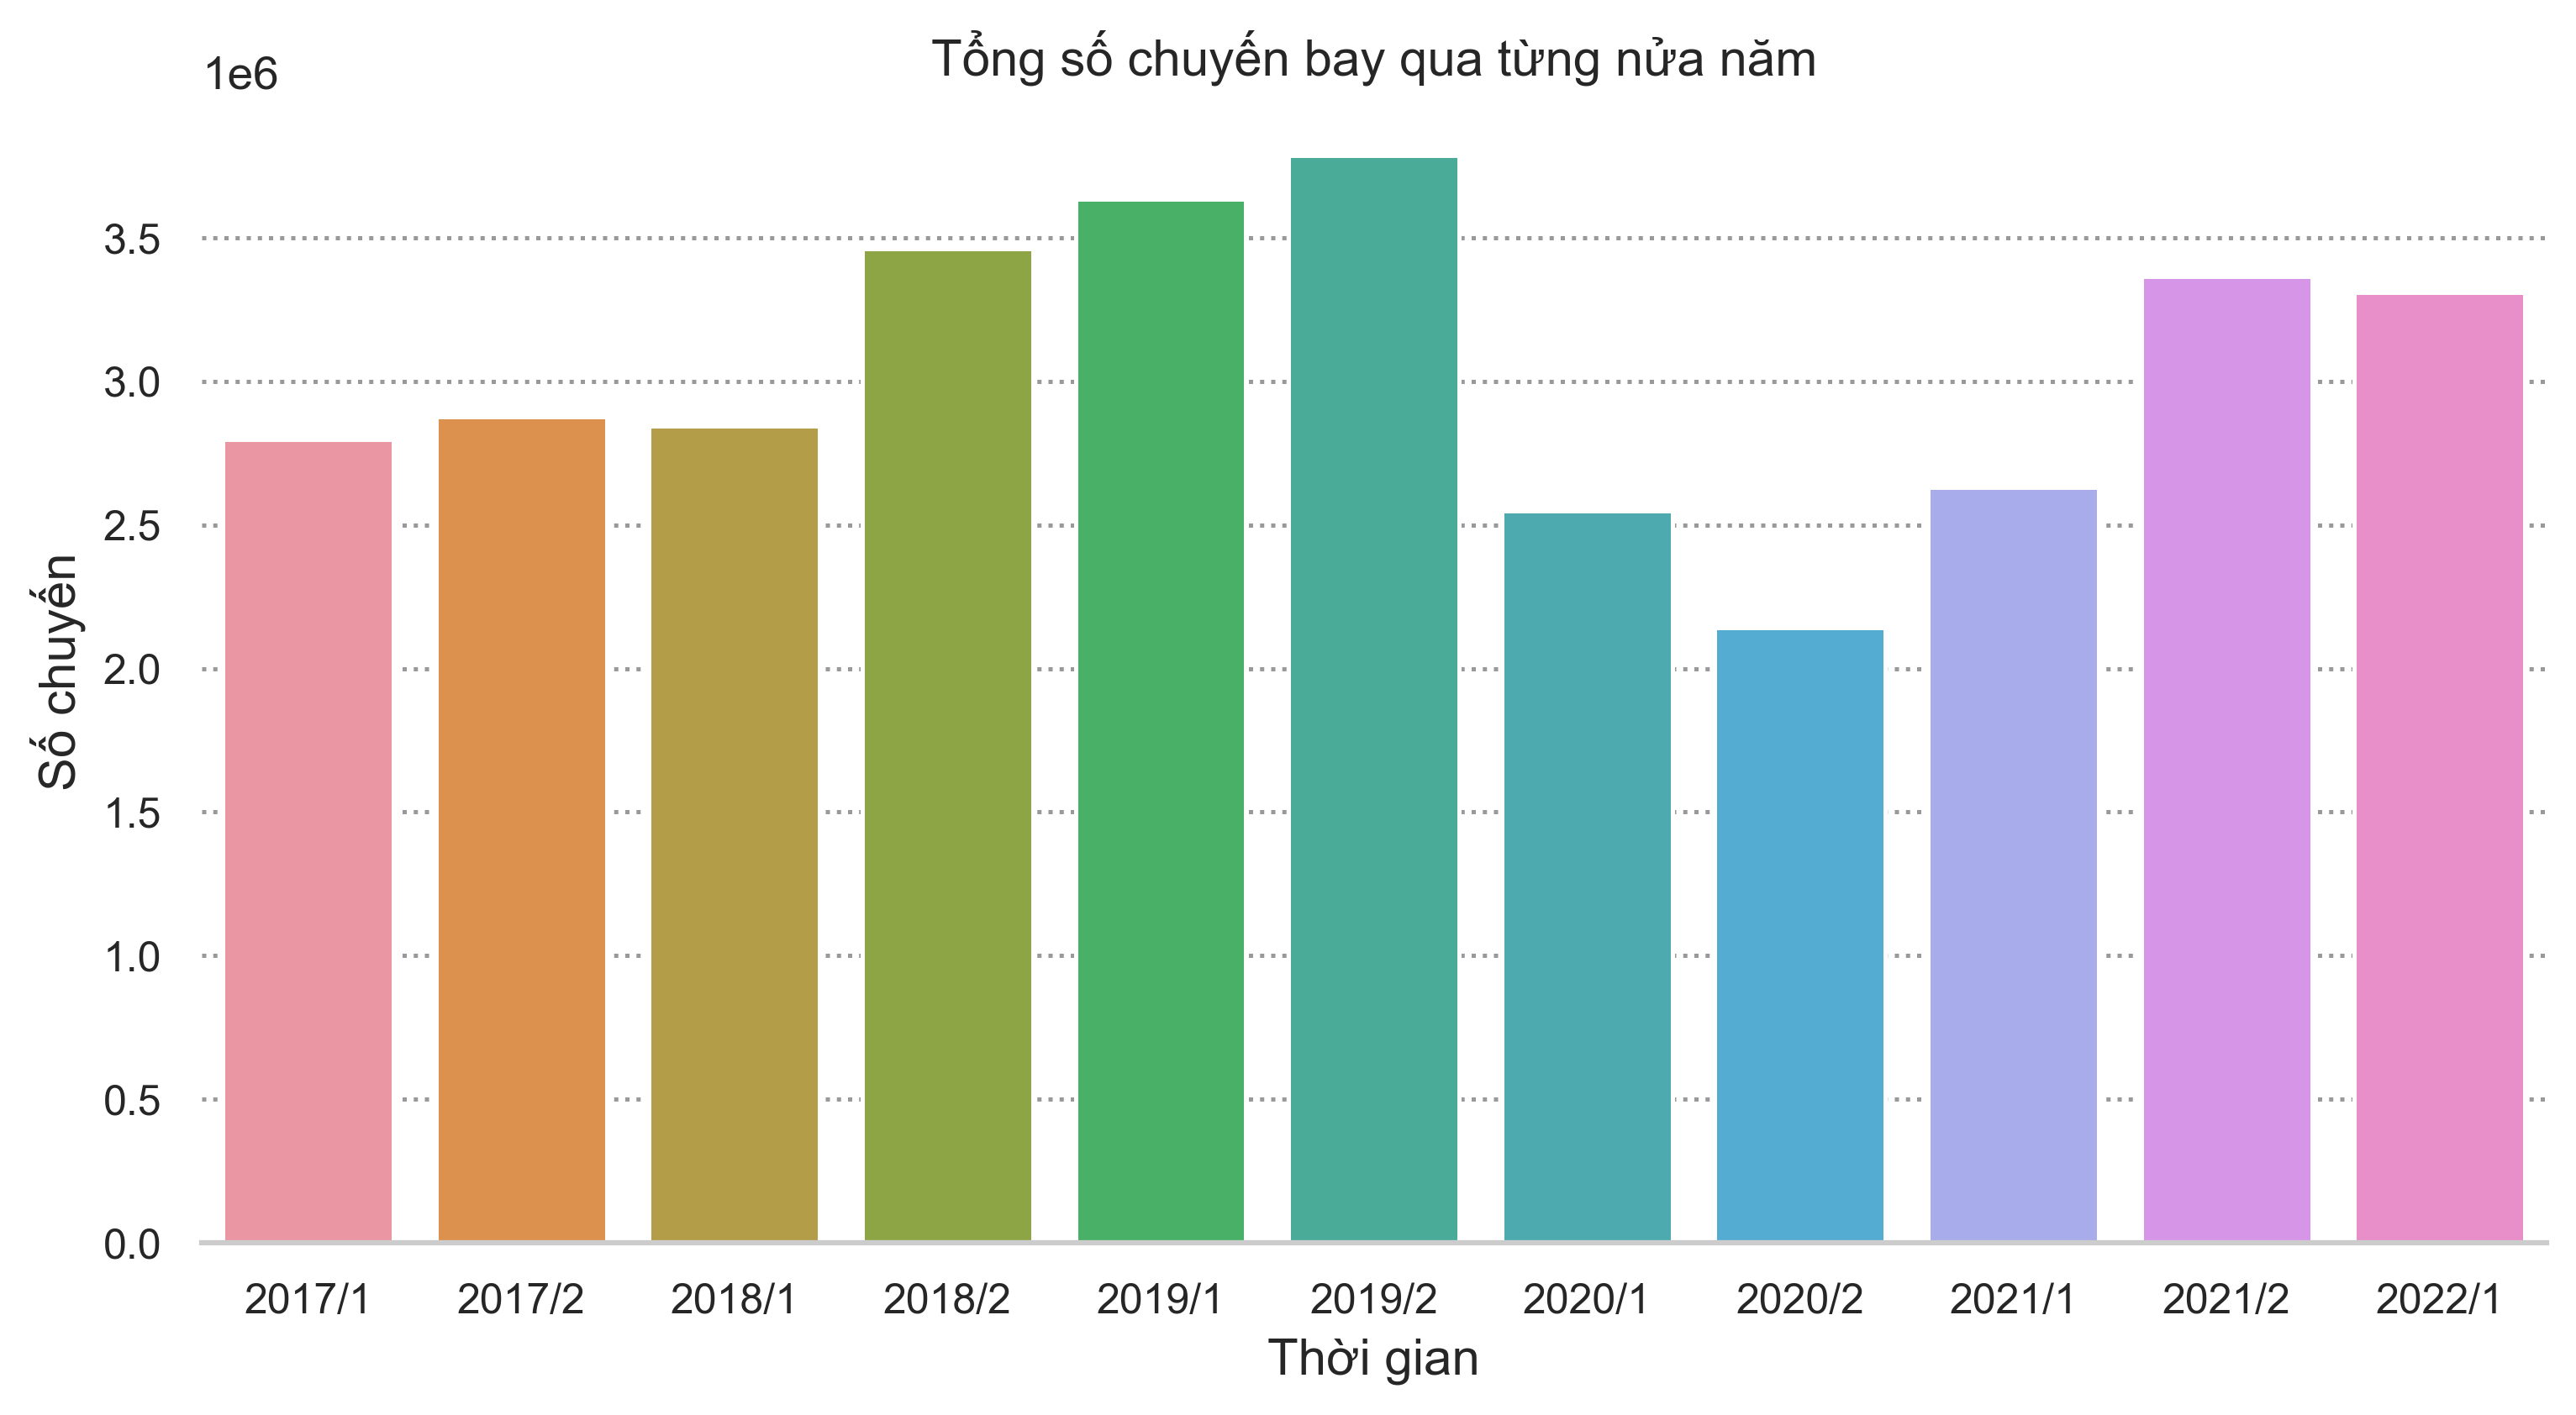

In [76]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
ax0 =  sns.barplot(data = df1, x = 'year period', y = 'Tổng số chuyến')
plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Tổng số chuyến bay qua từng nửa năm', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét: </h3>

Khi xét tổng số chuyến bay trong mỗi nửa năm:
- Từ nửa đầu năm 2018 về trước và nửa sau năm 2021 về sau, số lượng chuyến bay giữ số lượng ổn định.

- Số chuyến tăng mạnh từ nửa cuối 2018, tăng liên tục đến nửa sau 2019. Đây là thời kì hàng không Mỹ phát triển nhất.

- Sau đó từ 2020 số chuyến giảm mạnh. Đây là thời điểm dịch Covid bùng nổ, đường hàng không bị hạn chế do ảnh hưởng của dịch bệnh.
- Nửa sau 2021, số chuyến tăng lại và khá ổn định, tuy vậy số lượng vẫn thấp hơn so với ngay trước dịch bệnh.

=> Covid 19 ảnh hưởng nhiều đến hàng không, hiện tại tình hình dịch bệnh được kiểm soát, tình hình đường hàng không dần ổn định, nhưng vẫn chưa đạt được giá trị cao như ngay trước dịch.

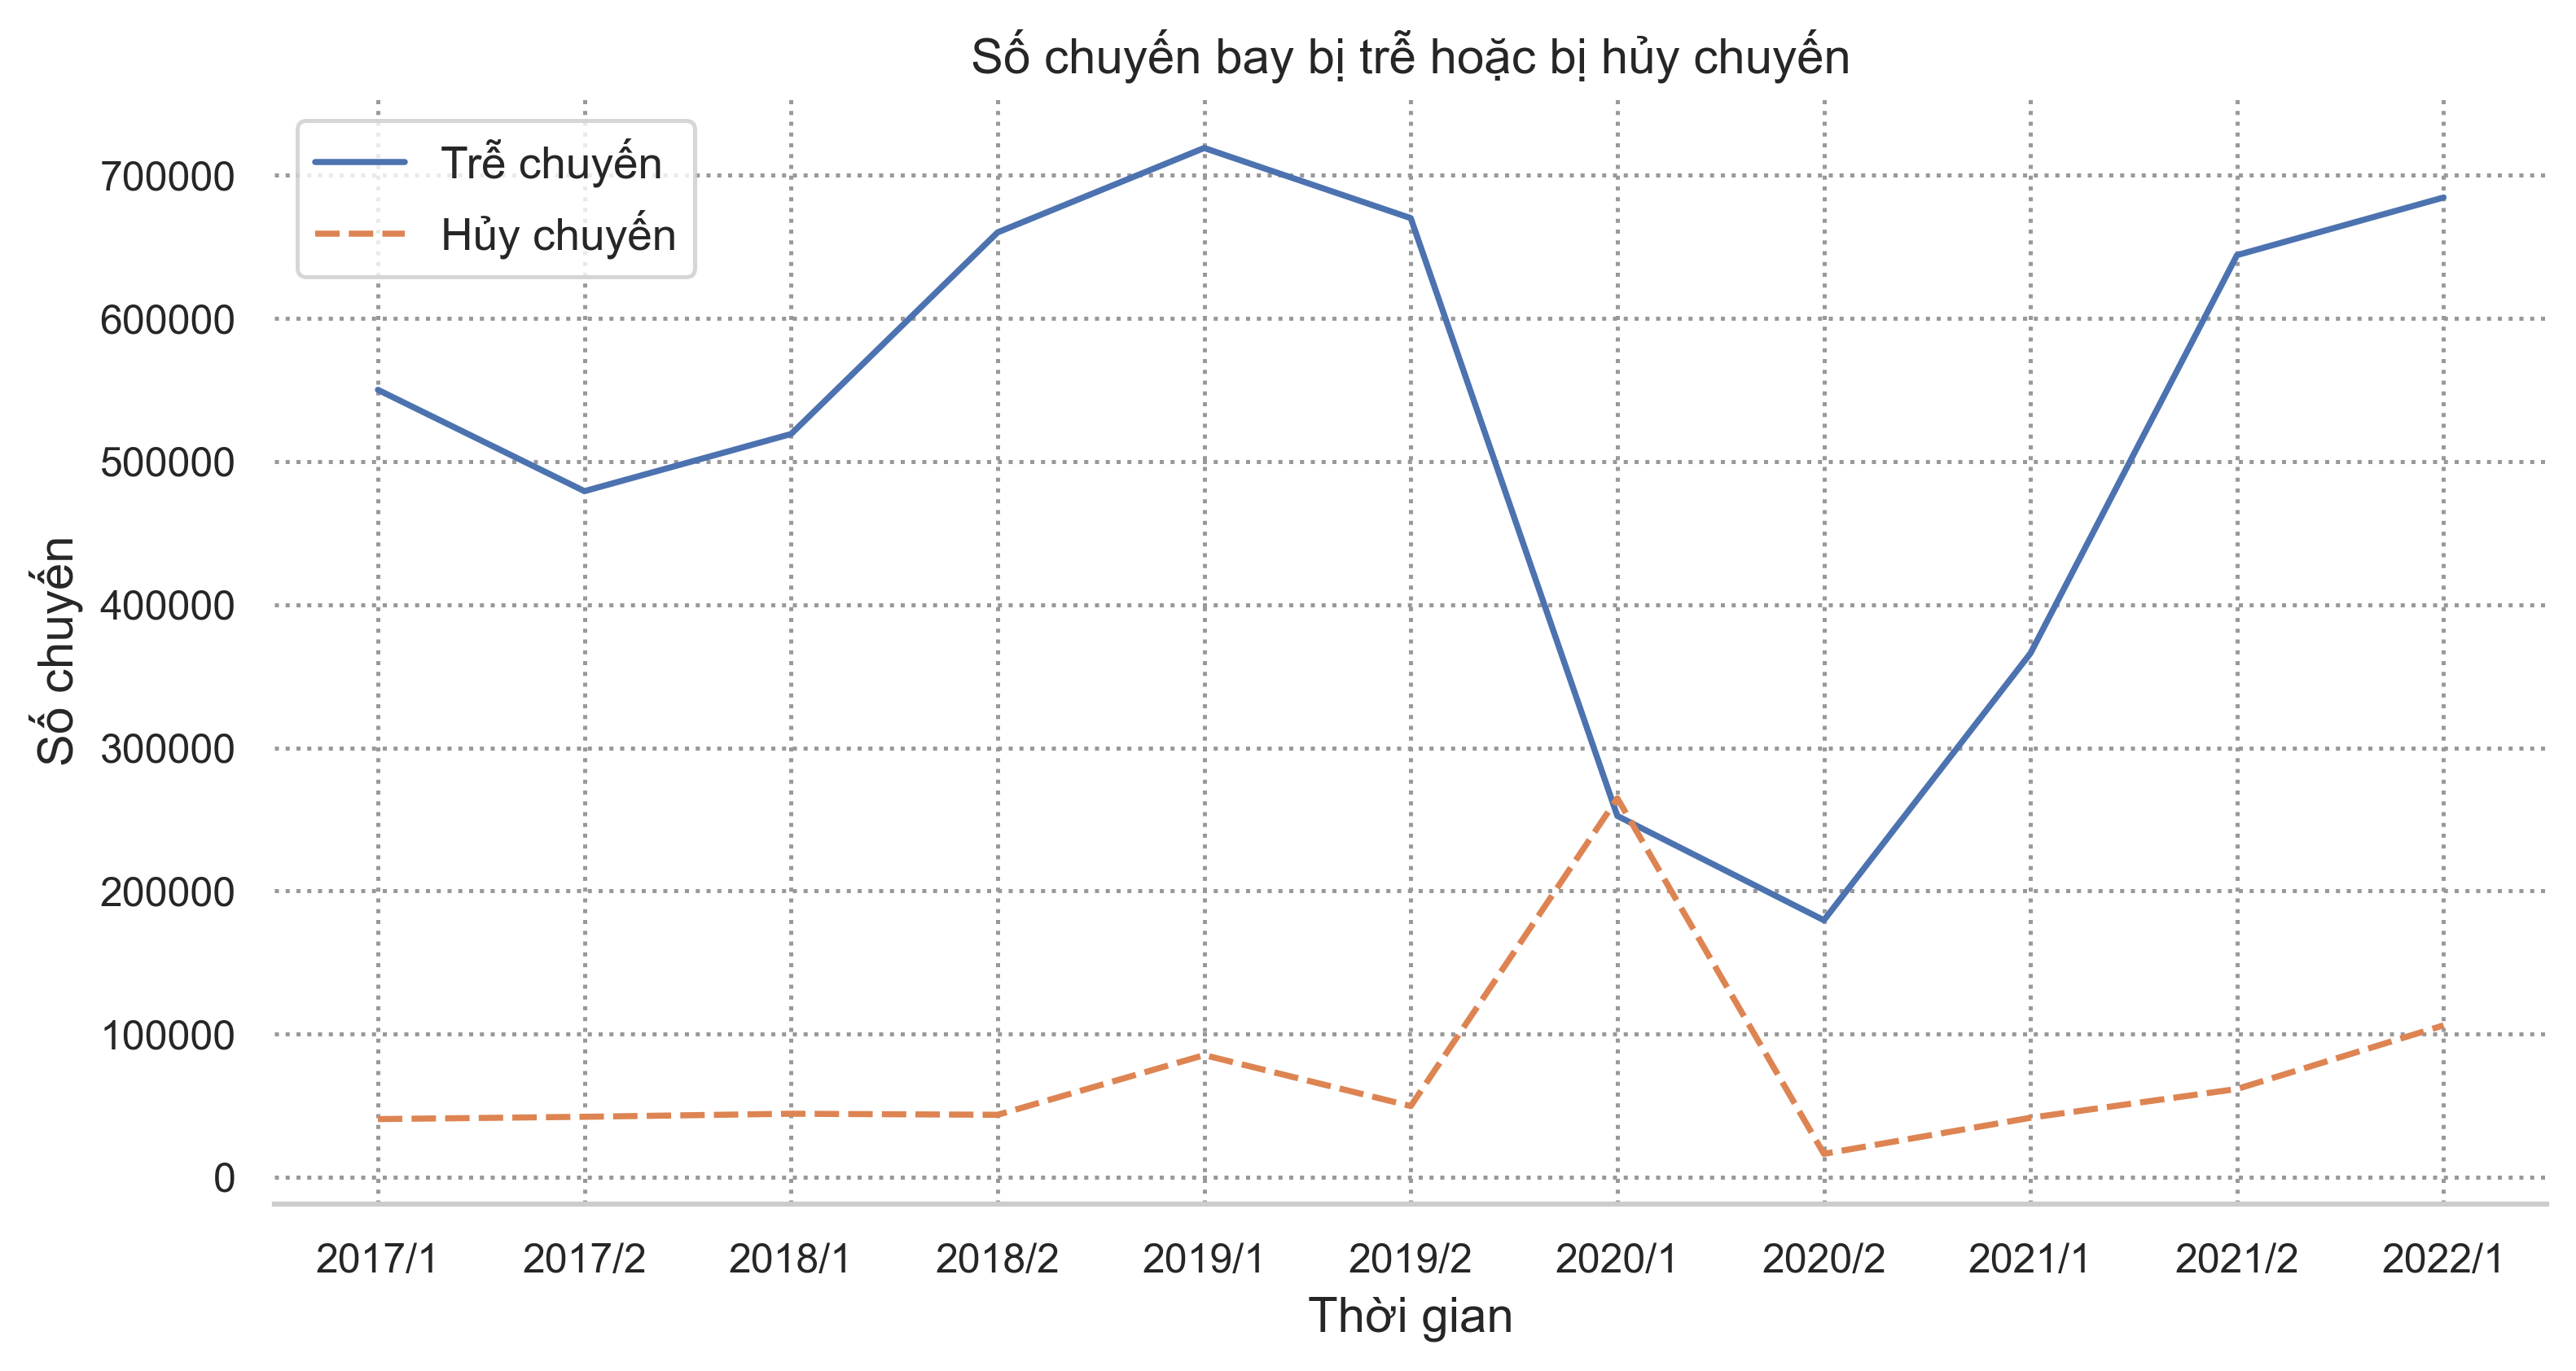

In [75]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#FFFFFF', "grid.color": ".9"})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
df_period_of_year = df1[['Trễ chuyến','Hủy chuyến','year period']].set_index('year period')

ax1 = sns.lineplot(data = df_period_of_year)

plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Số chuyến bay bị trễ hoặc bị hủy chuyến', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét:</h3>

- Có thể nhận thấy xu hướng tương đồng giữa số chuyến bị hủy, với tổng số chuyến (tăng vào 2018/2, giảm vào thời kì covid, dần cải thiện sau đó).

- Ngược lại, nhìn chung, số lượng chuyến bay bị hủy không có sự biến đổi nhiều, duy trì ở mức 50.000 chuyến/nửa năm. Chir có đặc biệt vào năm 2020, số chuyến bị hủy tăng lên gấp 3 lần, dễ hiểu do ảnh hưởng dịch bệnh.
- Sau khi hết dịch, số chuyến hủy trở lại giá trị như trước dịch, dù vậy nó đang có xu hướng tăng lên: đến nửa đầu 2022 gấp 2 lần giá trị trung bình được đo trước khi dịch covid bùng nổ.

<h3>2. Thời gian nào trong năm thường xảy ra trễ chuyến bay?</h3>